In [116]:
#pip install bls
#https://data.bls.gov/registrationEngine/
#export BLS_API_KEY=

In [117]:
#import neccessary library
import pandas as pd
import matplotlib as plt
import numpy as np
import bls

In [118]:
# get the wages data, namely Employment Cost Index, from US BLS
wages = bls.get_series('CIU1010000000000A')
print(wages)

date
2014Q1    1.8
2014Q2    2.0
2014Q3    2.2
2014Q4    2.2
2015Q1    2.6
2015Q2    2.0
2015Q3    2.0
2015Q4    2.0
2016Q1    1.9
2016Q2    2.3
2016Q3    2.3
2016Q4    2.2
2017Q1    2.4
2017Q2    2.4
2017Q3    2.5
2017Q4    2.6
2018Q1    2.7
2018Q2    2.8
2018Q3    2.8
2018Q4    2.9
2019Q1    2.8
2019Q2    2.7
2019Q3    2.8
2019Q4    2.7
2020Q1    2.8
2020Q2    2.7
2020Q3    2.4
2020Q4    2.5
2021Q1    2.6
2021Q2    2.9
2021Q3    3.7
2021Q4    4.0
2022Q1    4.5
2022Q2    5.1
2022Q3    5.0
2022Q4    5.1
2023Q1    4.8
Freq: Q-DEC, Name: CIU1010000000000A, dtype: float64


/Users/raymondli/miniconda3/lib/python3.10/site-packages/bls/api.py:106: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.assign(date=pd.to_datetime(


In [119]:
# store the wage data into a new csv file
# convert the Wage data into a dataframe
wages.to_csv('bls_wage_data.csv')
df = pd.read_csv('bls_wage_data.csv')
df.columns = 'Date', 'Wages'
print(df)

      Date  Wages
0   2014Q1    1.8
1   2014Q2    2.0
2   2014Q3    2.2
3   2014Q4    2.2
4   2015Q1    2.6
5   2015Q2    2.0
6   2015Q3    2.0
7   2015Q4    2.0
8   2016Q1    1.9
9   2016Q2    2.3
10  2016Q3    2.3
11  2016Q4    2.2
12  2017Q1    2.4
13  2017Q2    2.4
14  2017Q3    2.5
15  2017Q4    2.6
16  2018Q1    2.7
17  2018Q2    2.8
18  2018Q3    2.8
19  2018Q4    2.9
20  2019Q1    2.8
21  2019Q2    2.7
22  2019Q3    2.8
23  2019Q4    2.7
24  2020Q1    2.8
25  2020Q2    2.7
26  2020Q3    2.4
27  2020Q4    2.5
28  2021Q1    2.6
29  2021Q2    2.9
30  2021Q3    3.7
31  2021Q4    4.0
32  2022Q1    4.5
33  2022Q2    5.1
34  2022Q3    5.0
35  2022Q4    5.1
36  2023Q1    4.8


In [120]:
# get the CPI data from US BLS
# convert the data to csv file as cpi_data.csv
# adding two column headers (Date and CPI)
cpi = bls.get_series('CUUR0000SA0')
cpi.to_csv('cpi_data.csv')
cpi_data = pd.read_csv('cpi_data.csv')
cpi_data.columns = 'Date', 'CPI'
print(cpi_data)

        Date      CPI
0    2014-01  233.916
1    2014-02  234.781
2    2014-03  236.293
3    2014-04  237.072
4    2014-05  237.900
..       ...      ...
109  2023-02  300.840
110  2023-03  301.836
111  2023-04  303.363
112  2023-05  304.127
113  2023-06  305.109

[114 rows x 2 columns]


In [133]:
# Ensure the Date in cpi match with the date format in wages data set.
cpi_data['Date'] = cpi_data['Date'].str.replace('-0\
3', 'Q1')
cpi_data['Date'] = cpi_data['Date'].str.replace('-0\
6', 'Q2')
cpi_data['Date'] = cpi_data['Date'].str.replace('-0\
9', 'Q3')
cpi_data['Date'] = cpi_data['Date'].str.replace('-1\
2', 'Q4')
print(cpi_data['Date'])

0      2014-01
1      2014-02
2       2014Q1
3      2014-04
4      2014-05
        ...   
109    2023-02
110     2023Q1
111    2023-04
112    2023-05
113     2023Q2
Name: Date, Length: 114, dtype: object


In [134]:
# Drop the row that is not related to quarter 
newCPI_data = cpi_data[(cpi_data.Date.str.contains(\
"-") == False)]
print(newCPI_data)

       Date      CPI
2    2014Q1  236.293
5    2014Q2  238.343
8    2014Q3  238.031
11   2014Q4  234.812
14   2015Q1  236.119
17   2015Q2  238.638
20   2015Q3  237.945
23   2015Q4  236.525
26   2016Q1  238.132
29   2016Q2  241.018
32   2016Q3  241.428
35   2016Q4  241.432
38   2017Q1  243.801
41   2017Q2  244.955
44   2017Q3  246.819
47   2017Q4  246.524
50   2018Q1  249.554
53   2018Q2  251.989
56   2018Q3  252.439
59   2018Q4  251.233
62   2019Q1  254.202
65   2019Q2  256.143
68   2019Q3  256.759
71   2019Q4  256.974
74   2020Q1  258.115
77   2020Q2  257.797
80   2020Q3  260.280
83   2020Q4  260.474
86   2021Q1  264.877
89   2021Q2  271.696
92   2021Q3  274.310
95   2021Q4  278.802
98   2022Q1  287.504
101  2022Q2  296.311
104  2022Q3  296.808
107  2022Q4  296.797
110  2023Q1  301.836
113  2023Q2  305.109


In [123]:
# store the preprocessing cpi data into new file
newCPI_data.to_csv('cpi_clean.csv')

In [127]:
#copy the df and calculate the wage which fit with the calculation of CPI
#use 2014Q1  236.293 as base
newdf = df

def process_wages(x):
    newnum = 236.293
    if type(x) is str:
        return x
    elif x: 
#         (new - old)/old * 100 * 4 = ans  => new = ans / 400 * old + old
        newnum = (x / 400) * newnum + newnum
        return newnum
    else: 
        return

newWages = newdf.applymap(process_wages) 
print(newWages)

      Date       Wages
0   2014Q1  237.356319
1   2014Q2  237.474465
2   2014Q3  237.592612
3   2014Q4  237.592612
4   2015Q1  237.828904
5   2015Q2  237.474465
6   2015Q3  237.474465
7   2015Q4  237.474465
8   2016Q1  237.415392
9   2016Q2  237.651685
10  2016Q3  237.651685
11  2016Q4  237.592612
12  2017Q1  237.710758
13  2017Q2  237.710758
14  2017Q3  237.769831
15  2017Q4  237.828904
16  2018Q1  237.887978
17  2018Q2  237.947051
18  2018Q3  237.947051
19  2018Q4  238.006124
20  2019Q1  237.947051
21  2019Q2  237.887978
22  2019Q3  237.947051
23  2019Q4  237.887978
24  2020Q1  237.947051
25  2020Q2  237.887978
26  2020Q3  237.710758
27  2020Q4  237.769831
28  2021Q1  237.828904
29  2021Q2  238.006124
30  2021Q3  238.478710
31  2021Q4  238.655930
32  2022Q1  238.951296
33  2022Q2  239.305736
34  2022Q3  239.246663
35  2022Q4  239.305736
36  2023Q1  239.128516


In [136]:
# merge the preprocessing data into one dataframe
merged_data = pd.merge(newCPI_data, newWages, on="Date")
print(merged_data)

      Date      CPI       Wages
0   2014Q1  236.293  237.356319
1   2014Q2  238.343  237.474465
2   2014Q3  238.031  237.592612
3   2014Q4  234.812  237.592612
4   2015Q1  236.119  237.828904
5   2015Q2  238.638  237.474465
6   2015Q3  237.945  237.474465
7   2015Q4  236.525  237.474465
8   2016Q1  238.132  237.415392
9   2016Q2  241.018  237.651685
10  2016Q3  241.428  237.651685
11  2016Q4  241.432  237.592612
12  2017Q1  243.801  237.710758
13  2017Q2  244.955  237.710758
14  2017Q3  246.819  237.769831
15  2017Q4  246.524  237.828904
16  2018Q1  249.554  237.887978
17  2018Q2  251.989  237.947051
18  2018Q3  252.439  237.947051
19  2018Q4  251.233  238.006124
20  2019Q1  254.202  237.947051
21  2019Q2  256.143  237.887978
22  2019Q3  256.759  237.947051
23  2019Q4  256.974  237.887978
24  2020Q1  258.115  237.947051
25  2020Q2  257.797  237.887978
26  2020Q3  260.280  237.710758
27  2020Q4  260.474  237.769831
28  2021Q1  264.877  237.828904
29  2021Q2  271.696  238.006124
30  2021

/var/folders/1s/hjk6vgwx413bb0gvk7wfl_z40000gn/T/ipykernel_19072/2266764097.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(merged_data.Date)


Text(0.5, 0, 'Dates')

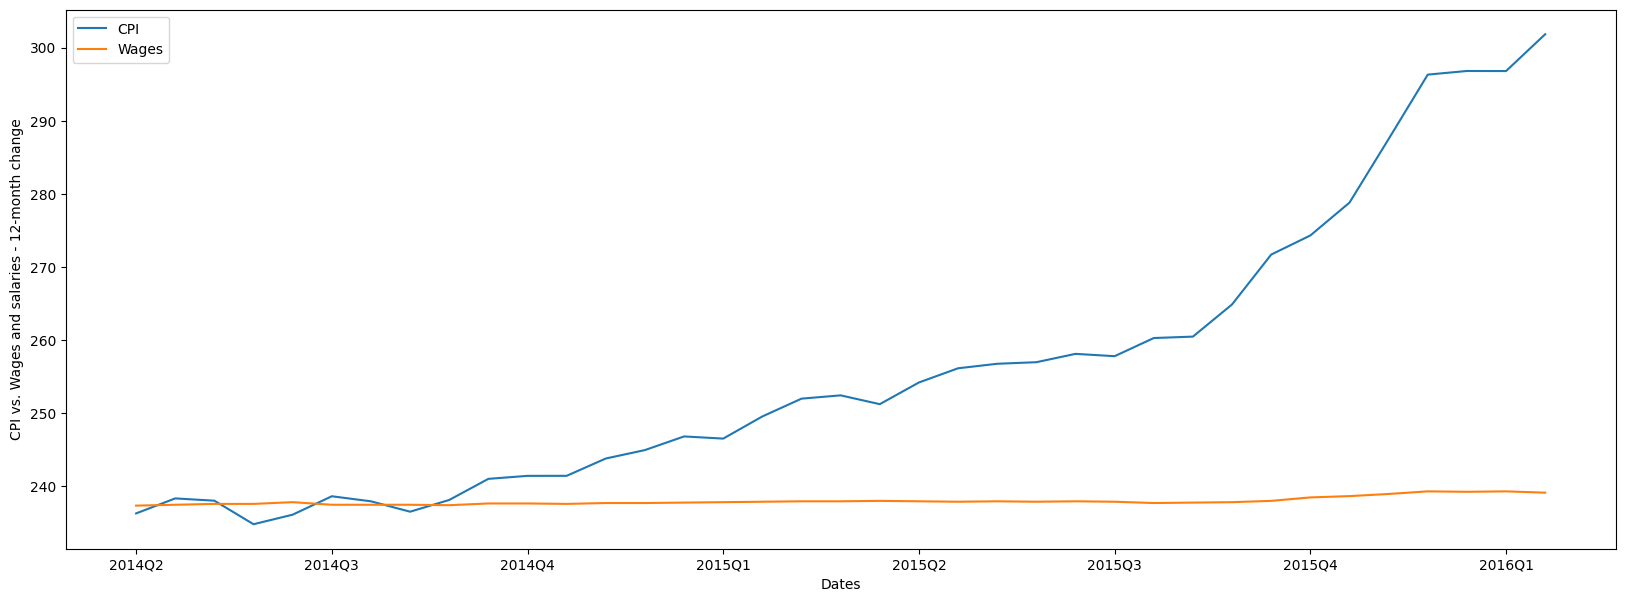

In [140]:
# plotting a bar chart using pandas
ax = merged_data.plot(kind="line", figsize=(20, 7))
ax.set_xticklabels(merged_data.Date)
ax.set_ylabel('CPI vs. Wages and salaries - 12-month change')
ax.set_xlabel('Dates')